1. Pada bagian 2.a, cobalah untuk melakukan hal yang sama dengan materi, namun, gantilah warna berdasarkan `random_bobot`.

In [ ]:
!pip install pandas==3.0.0
!pip install geopandas
!pip install contextily
!pip install osmnx
!pip install mapclassify
!pip install h3
!pip install matplotlib==3.1.3
!pip install openpyxl==3.0.9

ERROR: Could not find a version that satisfies the requirement pandas==3.0.0 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5)
ERROR: No matching distribution found for pandas==3.0.0
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninst

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import os
import contextily as ctx
import numpy as np

epsg_jkt = 5330
epsg_mercator = 3857
default_crs = {'init':'epsg:4326'}

Menggunakan osmnx dengan tag amenity:cafe

In [ ]:
tags = {'amenity': 'cafe'}
cafe = ox.geometries_from_place("Jakarta, Indonesia", tags)



(3531526.430152763, 3564215.9899866143, 197726.11984052576, 229071.5713202212)

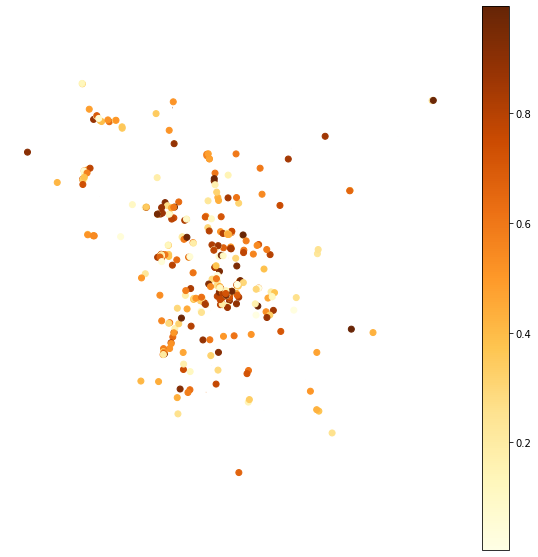

In [ ]:
np.random.seed(10)
cafe["random_bobot"] = np.random.uniform(size=len(cafe))
cafe_planar = cafe.to_crs(epsg=epsg_jkt)
fig, ax = plt.subplots(figsize=(10,10))
cafe_planar.plot(column="random_bobot", cmap="YlOrBr", legend=True, ax=ax)
ax.axis("off")

visualisasi peta jakarta


In [ ]:
from zipfile import ZipFile
file_name = '/content/dki_kelurahan.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Text(0.5, 1.0, 'Luas Jakarta Dalam Hektar: NaturalBreaks')

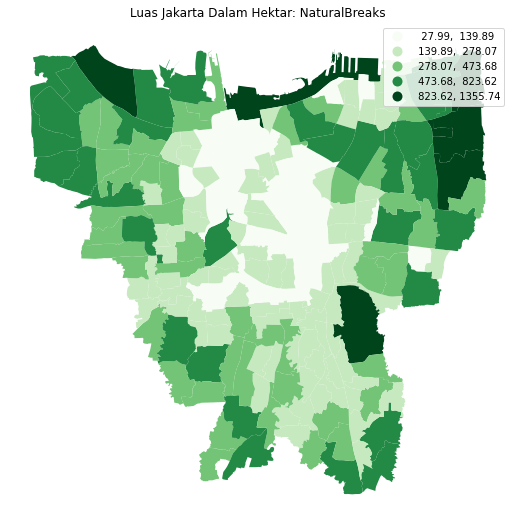

In [ ]:
jakarta = gpd.read_file("dki_kelurahan")
# proyeksi ke planar
jakarta_planar = jakarta.to_crs(epsg=epsg_jkt)

# hitung luas dalam hektar
jakarta_planar["luas_hektar"] = jakarta_planar.area/(10000^2)
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(222)
jakarta_planar.plot(column="luas_hektar", cmap="Greens", scheme="NaturalBreaks", k=5, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: NaturalBreaks")

In [ ]:
help(jakarta_planar.plot)

Help on GeoplotAccessor in module geopandas.plotting object:

class GeoplotAccessor(pandas.plotting._core.PlotAccessor)
 |  GeoplotAccessor(data)
 |  
 |  Plot a GeoDataFrame.
 |  
 |  Generate a plot of a GeoDataFrame with matplotlib.  If a
 |  column is specified, the plot coloring will be based on values
 |  in that column.
 |  
 |  Parameters
 |  ----------
 |  column : str, np.array, pd.Series (default None)
 |      The name of the dataframe column, np.array, or pd.Series to be plotted.
 |      If np.array or pd.Series are used then it must have same length as
 |      dataframe. Values are used to color the plot. Ignored if `color` is
 |      also set.
 |  kind: str
 |      The kind of plots to produce:
 |       - 'geo': Map (default)
 |       Pandas Kinds
 |       - 'line' : line plot
 |       - 'bar' : vertical bar plot
 |       - 'barh' : horizontal bar plot
 |       - 'hist' : histogram
 |       - 'box' : BoxPlot
 |       - 'kde' : Kernel Density Estimation plot
 |       - 'de

Visualisasi garis dengan bonus basemap menggunakan data jalur TransJakarta beserta jumlah riders di bulan Agustus 2020

In [ ]:
transjakarta_lines = gpd.read_file("transjakarta_lines.geojson")
transjakarta_data = pd.read_excel("TJ_Agustus_2020.xlsx", index_col=0).T.reset_index()

In [ ]:
# gabungkan data keduanya
transjakarta_lines['koridor'] = transjakarta_lines['koridor'].apply(int)
transjakarta_data['koridor'] = transjakarta_data['index'].apply(int)
transjakarta = pd.merge(transjakarta_lines, transjakarta_data)
# convert kembali ke geodataframe
transjakarta = gpd.GeoDataFrame(transjakarta)
# beri crs
transjakarta.crs = transjakarta_lines.crs
# convert ke planar
transjakarta_planar = transjakarta.to_crs(epsg=epsg_jkt)

In [ ]:
tj_lines_mercator = transjakarta.to_crs(epsg=epsg_mercator)

Text(0.5, 1.0, 'Jalur Busway dengan Basemap OpenStreetMap Mapnik')

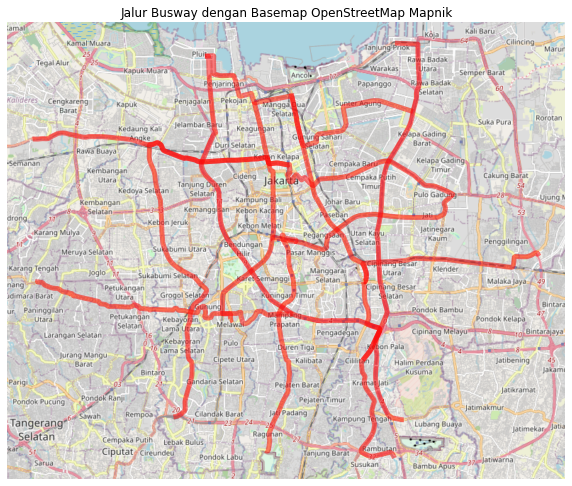

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
tj_lines_mercator.plot(ax=ax, linewidth=5, color="red", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.axis("off")
ax.set_title("Jalur Busway dengan Basemap OpenStreetMap Mapnik")

In [ ]:
ctx.providers

{'AzureMaps': {'MicrosoftBaseDarkGrey': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftBaseDarkGrey',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.base.darkgrey'},
  'MicrosoftBaseHybridRoad': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftBaseHybridRoad',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.base.hybrid.road'},
  'MicrosoftBaseRoad': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftBaseRoad',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.base.road'},
  'MicrosoftImagery': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftImagery',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.imagery'},
  'MicrosoftTerraMain': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftTerraMain',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.terra.main'},
  'MicrosoftWeatherInfraredMain': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile#uri-parameters for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile#uri-parameters for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftWeatherInfraredMain',
   'subscriptionKey': '<insert your subscription key here>',
   'timeStamp': '2021-05-08T09:03:00Z',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&timeStamp={timeStamp}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.weather.infrared.main'},
  'MicrosoftWeatherRadarMain': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile#uri-parameters for details.',
   'html_attribution': 'See https://docs.mi

4. Dengan menggunakan referensi dari materi day 13, buatlah kombinasi dari peta yang sudah dijelaskan (cafe, kelurahan, transjakarta) untuk mengetahui berapa banyak cafe pada radius 200m dari jalur transjakarta

In [ ]:
transjakarta_planar_buff200 = transjakarta_planar.copy()
transjakarta_planar_buff200["geometry"] = transjakarta_planar.geometry.buffer(200)


In [ ]:
# spatial join dengan garis yang diberi buffer 200m
tj_kelurahan = gpd.sjoin(jakarta_planar[["KEL_NAME","geometry"]], transjakarta_planar_buff200[["koridor","geometry"]])

tj_cafe = gpd.sjoin(cafe_planar[["geometry"]], transjakarta_planar_buff200[["koridor","geometry"]] )

Text(0.5, 1.0, 'Kelurahan yang ada di sekitar 500m dari jalur TransJakarta')

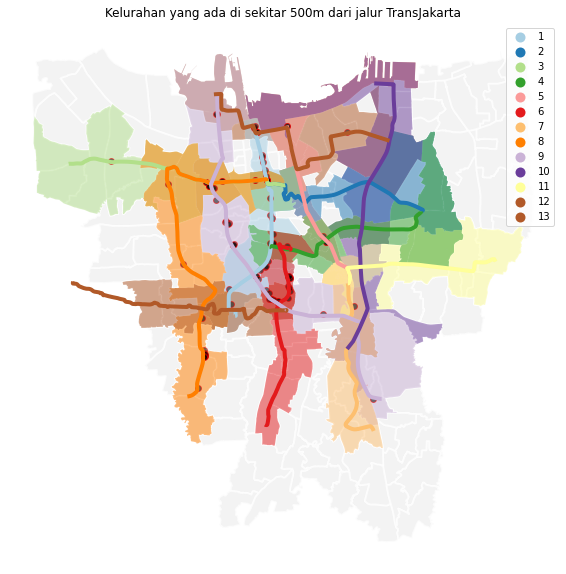

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", linewidth=2, edgecolor="white", alpha=0.7)
tj_kelurahan.plot(column="koridor", categorical=True, k=13, cmap="Paired", alpha=0.5, ax=ax)
transjakarta_planar.plot(ax=ax, linewidth=4, column="koridor", alpha=1, categorical=True, legend=True, k=13, cmap="Paired")
tj_cafe.plot(linewidth=1, color='Black', edgecolor="red", alpha=0.5, ax=ax)
ax.axis("off")
ax.set_title("Kelurahan yang ada di sekitar 500m dari jalur TransJakarta")